<div class="alert alert-block alert-success">
<br>
<font size = "+6", color = 'black'> <center> RMM ACCESS-S Exploring </center></font>
<br>

<font color = 'black'> <center> Andrew Marshal Said there will only be 11 ensembles, but there appears
to be 12. Exploring this.</center></font>

</div>

# Preamble

In [1]:

import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dask.array
import cartopy.crs as ccrs
import pickle
import matplotlib.colors as colors
import datetime as dt
import pickle
from matplotlib.colors import BoundaryNorm
rb = plt.cm.RdBu
bm = plt.cm.Blues
best_blue = '#9bc2d5'
recherche_red = '#fbc4aa'
wondeful_white = '#f8f8f7'
import glob
import pdb

'''Jupyter Markdown Cheat Sheet'''
# https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed
# https://www.ibm.com/support/knowledgecenter/en/SSGNPV_1.1.3/dsx/markd-jupyter.html

'Jupyter Markdown Cheat Sheet'

In [2]:
'''The RMM from ACCESS-S that I have pieced together in the file: RMM_ACCESS-S'''
access = xr.open_dataset('rmm_access.nc')
access

<xarray.Dataset>
Dimensions:    (ensemble: 12, time: 8401)
Coordinates:
  * ensemble   (ensemble) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * time       (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2012-12-31
Data variables:
    phase      (ensemble, time) float32 ...
    amplitude  (ensemble, time) float32 ...

In [3]:
'''The RMM from ACCESS-S that I have pieced together in the file: RMM_ACCESS-S'''
access_raw = xr.open_dataset('rmm_access_raw.nc')
access_raw

<xarray.Dataset>
Dimensions:   (ensemble: 12, time: 8401)
Coordinates:
  * time      (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2012-12-31
  * ensemble  (ensemble) int64 0 1 2 3 4 5 6 7 8 9 10 11
Data variables:
    rmm1      (ensemble, time) float32 ...
    rmm2      (ensemble, time) float32 ...

# RMM1 and RMM2 Plots

In [35]:
import matplotlib.gridspec as gridspec

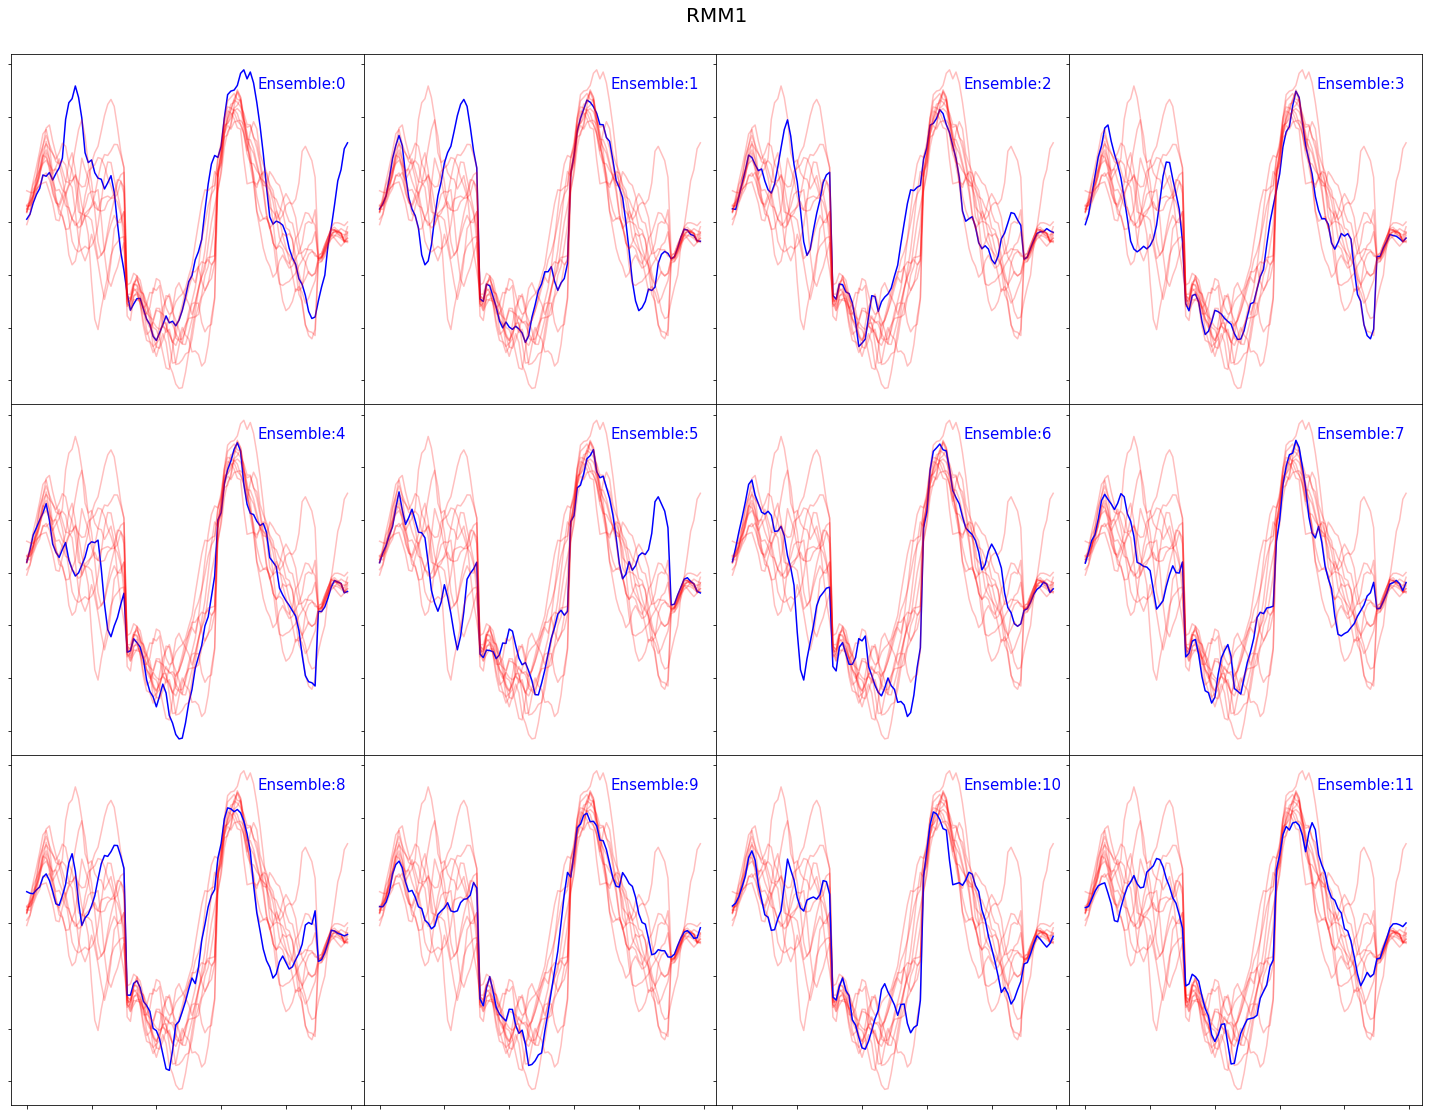

In [103]:
fig = plt.figure(figsize = (20,15))
gs = gridspec.GridSpec(3,4)
gs.update(wspace=0.0, hspace=0.0)

col_num = [0,1,2,3]
row_num = [0,1,2]
ensemble_blue = 0

for  row in row_num:
    for col in col_num:
        ax = fig.add_subplot(gs[row, col])
        for ensemble in access_raw.ensemble.values:
            if ensemble == ensemble_blue:
                color = 'b'
                alpha = 1
                
               
            else:
                color = 'r'
                alpha = 0.25
        

            ax.plot(access_raw.sel(ensemble = ensemble).rmm1.isel(time = slice(0,100)), color = color,
                    alpha = alpha)
            
  

        ax.annotate('Ensemble:' + str(ensemble_blue), xy = (0.7,0.9), color = 'b',
                    xycoords = 'axes fraction', fontsize =15)
        ax.tick_params(labelbottom  = False, labelleft = False)
        ensemble_blue += 1
        
        
fig.suptitle('RMM1', y = 1.03, fontsize = 20)
fig.tight_layout()
plt.savefig('ACESS-S RMM1 All Ensemble.png', dpi = 300, bbox_inches = 'tight')


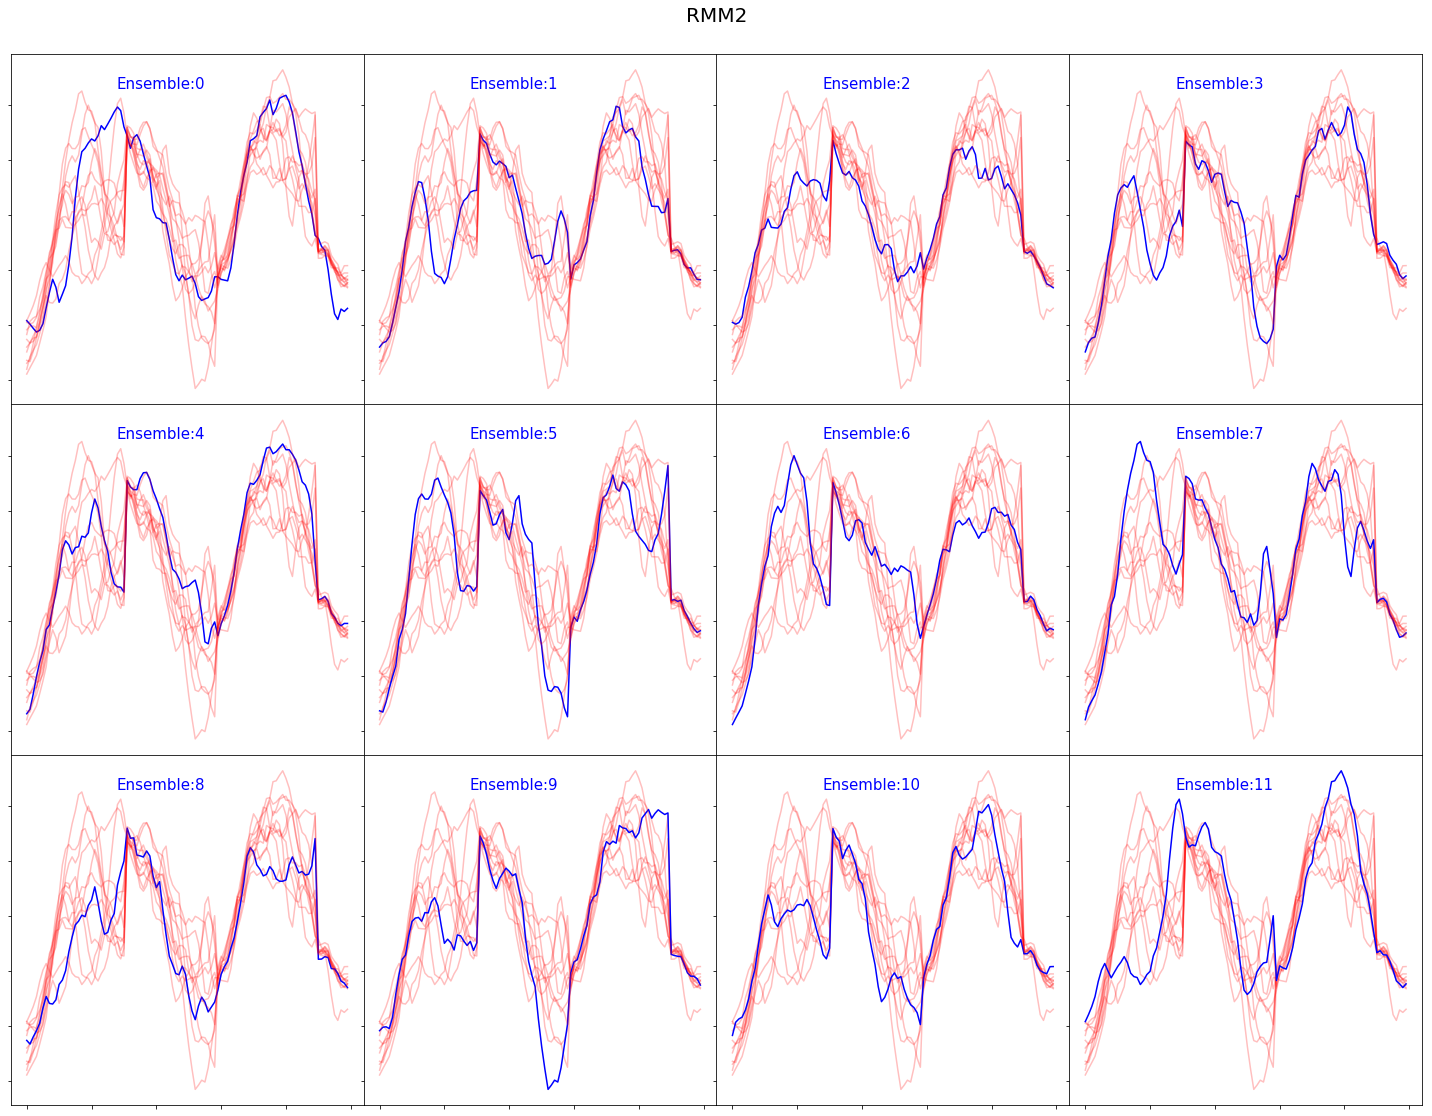

In [102]:
fig = plt.figure(figsize = (20,15))
gs = gridspec.GridSpec(3,4)
gs.update(wspace=0.0, hspace=0.0)

col_num = [0,1,2,3]
row_num = [0,1,2]
ensemble_blue = 0

for  row in row_num:
    for col in col_num:
        ax = fig.add_subplot(gs[row, col])
        for ensemble in access_raw.ensemble.values:
            if ensemble == ensemble_blue:
                color = 'b'
                alpha = 1
                
               
            else:
                color = 'r'
                alpha = 0.25
        

            ax.plot(access_raw.sel(ensemble = ensemble).rmm2.isel(time = slice(0,100)), color = color,
                    alpha = alpha)
            
  

        ax.annotate('Ensemble:' + str(ensemble_blue), xy = (0.3,0.9), color = 'b',
                    xycoords = 'axes fraction', fontsize =15)
        ax.tick_params(labelbottom  = False, labelleft = False)
        ensemble_blue += 1
        
        
fig.suptitle('RMM2', y = 1.03, fontsize = 20)
fig.tight_layout()
plt.savefig('ACESS-S RMM2 All Ensemble.png', dpi = 300, bbox_inches = 'tight')

# Exploring Raw

In [96]:
'''There is a different file for every single month. Thus 12 files in total'''

rmm_path = '/home/563/ab2313/MJO/RMM/RMM_access_raw/'
rmm_files = glob.glob(rmm_path + '*.nc')
rmm_files

['/home/563/ab2313/MJO/RMM/RMM_access_raw/RMM12_day01_month01_1990-2012_ncep_access-s1.nc',
 '/home/563/ab2313/MJO/RMM/RMM_access_raw/RMM12_day01_month02_1990-2012_ncep_access-s1.nc',
 '/home/563/ab2313/MJO/RMM/RMM_access_raw/RMM12_day01_month03_1990-2012_ncep_access-s1.nc',
 '/home/563/ab2313/MJO/RMM/RMM_access_raw/RMM12_day01_month04_1990-2012_ncep_access-s1.nc',
 '/home/563/ab2313/MJO/RMM/RMM_access_raw/RMM12_day01_month05_1990-2012_ncep_access-s1.nc',
 '/home/563/ab2313/MJO/RMM/RMM_access_raw/RMM12_day01_month06_1990-2012_ncep_access-s1.nc',
 '/home/563/ab2313/MJO/RMM/RMM_access_raw/RMM12_day01_month09_1990-2012_ncep_access-s1.nc',
 '/home/563/ab2313/MJO/RMM/RMM_access_raw/RMM12_day01_month10_1990-2012_ncep_access-s1.nc',
 '/home/563/ab2313/MJO/RMM/RMM_access_raw/RMM12_day01_month11_1990-2012_ncep_access-s1.nc',
 '/home/563/ab2313/MJO/RMM/RMM_access_raw/RMM12_day01_month12_1990-2012_ncep_access-s1.nc',
 '/home/563/ab2313/MJO/RMM/RMM_access_raw/RMM12_day01_month07_1990-2012_ncep_acc

In [98]:
tfile = xr.open_dataset(rmm_files[0])
tfile.attrs = {}
tfile

<xarray.Dataset>
Dimensions:     (mode: 2, nfc: 23, nvars: 12, time: 50)
Coordinates:
  * time        (time) timedelta64[ns] 1 days 2 days 3 days ... 49 days 50 days
  * nfc         (nfc) int32 19900101 19910101 19920101 ... 20110101 20120101
  * mode        (mode) int32 1 2
  * nvars       (nvars) int32 0 1 2 3 4 5 6 7 8 9 10 11
Data variables:
    RMM12       (nvars, mode, nfc, time) float32 ...
    RMM12_ERAI  (mode, nfc, time) float32 ...